<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Why do things happen and how do we know?

We've looked at differences between groups, but another important question is often "what is the link between X and Y?"

To look at associations between variables we use **correlation**.

When we talk about correlation we typically mean **linear** relationships (Pearson's coefficient).

Correlation is measured on a scale from -1 (perfect negative correlation) to 1 (perfect positive correlation).

In [1]:
import numpy as np
from scipy import stats

np.random.seed(42)

numbers = np.array(range(1, 20))
numbers_2 = (numbers * 2) + np.random.randint(-2, 2, len(numbers))

print(numbers)
print(numbers_2)

correlation, p_value = stats.pearsonr(numbers, numbers_2)
print(correlation)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 2  5  4  8 10 13 12 14 18 19 22 24 26 28 31 30 35 37 39]
0.9956384835966164


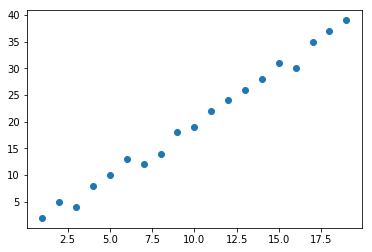

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(numbers, numbers_2);

In [3]:
import numpy as np
from scipy import stats

np.random.seed(42)

numbers = np.array(range(1, 20))
numbers_2 = np.array(range(-3, -22, -1)) + np.random.randint(-2, 2, len(numbers))

print(numbers)
print(numbers_2)

correlation, p_value = stats.pearsonr(numbers, numbers_2)
print(correlation)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ -3  -3  -7  -6  -7  -7 -11 -12 -11 -13 -13 -14 -15 -16 -16 -20 -18 -19
 -20]
-0.9801110637351961


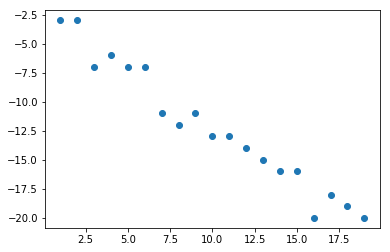

In [4]:
plt.scatter(numbers, numbers_2);

![](assets/images/xkcd_regression.png)

What if I have lots of variables?

In [16]:
import pandas as pd

df = pd.read_csv("assets/datasets/iris.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Instead of calculating pairs of correlations we can do it in one go.

In [6]:
df_numeric = df.drop("class", axis=1)

df_numeric.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [9]:
np.corrcoef(df_numeric.T)

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

Instead of looking at tables of numbers...

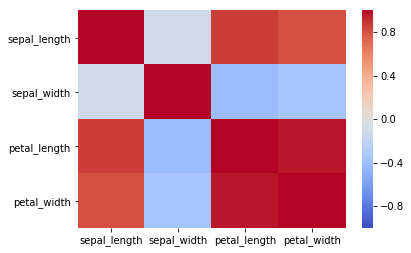

In [10]:
import seaborn as sns

sns.heatmap(df_numeric.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap="coolwarm");

That's still a visual representation of a table of numbers. Let's plot the actual data

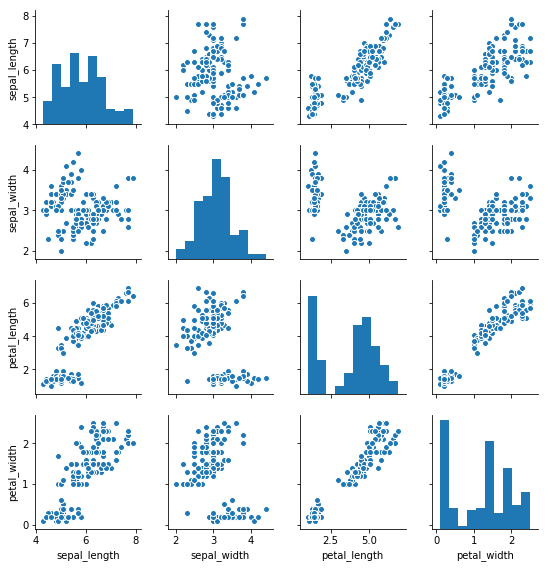

In [112]:
sns.pairplot(df, size=2);

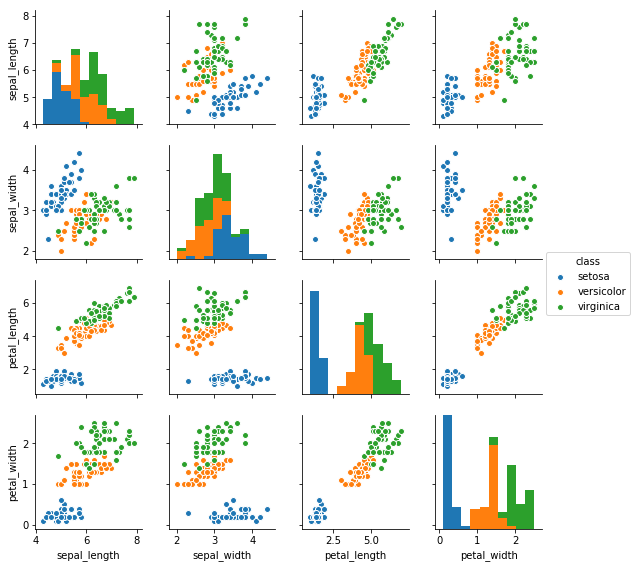

In [12]:
sns.pairplot(df, hue="class", size=2);

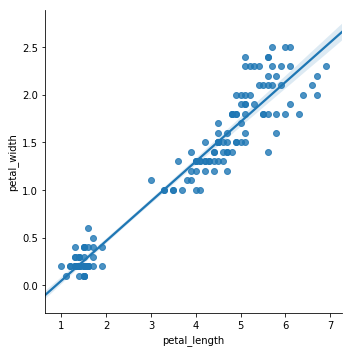

In [109]:
sns.lmplot("petal_length", "petal_width", df);

Why bother plotting the data on top of getting correlation coefficients?

![](assets/images/correlation_examples.png)

#### Exercise: Guess the Correlation

http://guessthecorrelation.com

# Correlation & Causation

![](assets/images/xkcd_causation.png)

As Data Scientists, why should we care about causality?

- to help people make better decisions, we need to understand (or have theories about) **why** things happen

Remember the "numbers went up since last month" style reports

Thinking about causality allows us to go beyond that:

- what are robust explanations for those numbers moving, or a high correlation?

- what decisions are available as a consequence?

- how can we measure success?

Correlation measures how variables A and B **vary together**

- the temperature outside and inside are correlated

Causality is about how changes in A happen **because of** changes in B

- changing the thermostat inside will cause the temperature inside to change

In this example, while the temperature outside and inside are correlated, the causal link is between the thermostat and the inside temperature.

### Reasons for correlation

- true causation

What about this example?

![](assets/images/shark_attacks_vs_ice_cream_sales.jpg)

### Reasons for correlation

- true causation

- confounding variables (A and B are correlated, but are caused by C)

- random chance = where correlation **does not imply** causation

![](assets/images/cage_spurious_correlation.png)

from [Spurious Correlations](http://www.tylervigen.com/spurious-correlations)

It's easy to always say "correlation does not imply causation", but we need to make decisions and **correlation is (pretty much) all we have**

So how do we assess the validity of a correlation we see?

In an ideal world, everything would be a randomised control trial.

This is **very hard** and often impossible in business, there's too much bias in our data.

<img src="assets/images/hill.jpg" style="width:50%" />

Sir Austin Bradford Hill was an epidemiologist who established a group of principles, now called "Hill's Criteria", to assess the validity of a correlation.

Some of them are specific to public health (regarding dosages etc.) but most of them are useful to us.

#### Strength

How strong is the effect?

#### Consistency

Can your findings be repeated? Has anyone else replicated your findings?

#### Specificity

How specific is your explanation? Are there other plausible explanations?

#### Temporality

Does cause come before effect?

#### Plausibility

Does the relationship actually make sense?

#### Coherence

Do experts agree with the findings? Related to plausibility.

#### Analogy

Have we seen anything like this before?

### Exercise

Think about the results of a hypothetical A/B test:

- a website updated its colour scheme from grey to red
- they measured the clickthrough rate when it was grey, changed the website to red and measured it again
- "we found a correlation between the amount of red on the landing page and the clickthrough rate"

In pairs discuss how you would use Hill's criteria to assess whether this correlation could be explained by causation.

Reminder:

- **Strength**: how strong is the association?
- **Consistency**: can we replicate the findings?
- **Specificity**: can anything else explain our findings?
- **Temporality**: does cause come before effect?
- **Plausibility**: does the relationship make sense?
- **Coherence**: would experts agree with the findings?
- **Analogy**: have we seen examples of this before?